# **CLASSIFICATION OF TOMATO PLANT DISEASE**

1. Import needed library for work

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import zipfile

from google.colab import files
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image

Upload kaggle json

In [26]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"zenixfajar","key":"d897f915d147157ffc927df6b4ab05df"}'}

2. Add kaggle json

In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

3. Download dataset dari kaggle

In [3]:
! kaggle datasets download kaustubhb999/tomatoleaf

 96% 172M/179M [00:01<00:00, 106MB/s] 
100% 179M/179M [00:01<00:00, 113MB/s]


3. Open zipfile

In [4]:
local_zip = './tomatoleaf.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tomatoleaf')

4. Add file directory

In [5]:
base_dir = './tomatoleaf/tomato'
print(os.listdir(base_dir))

train_dir = os.path.join(base_dir, 'train')
print(os.listdir(train_dir))

val_dir = os.path.join(base_dir, 'val')
print(os.listdir(val_dir))

['val', 'cnn_train.py', 'train']
['Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Tomato___Early_blight']
['Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Septoria_leaf_spot', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Tomato___Early_blight']


5. Create dataset

In [6]:
BATCH_SIZE = 64
IMG_WIDTH = 256
IMG_HEIGHT = 256

TRAINING_DIR = train_dir
VALIDATION_DIR = val_dir

train_datagen = tf.keras.utils.image_dataset_from_directory(
    TRAINING_DIR,
    labels='inferred',
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=True,
    seed=123,
    batch_size=64,
)

# label_map = (train_datagen.class_indices)
# print(label_map)

val_datagen = tf.keras.utils.image_dataset_from_directory(
    VALIDATION_DIR,
    labels='inferred',
    image_size=(IMG_WIDTH, IMG_HEIGHT),
    shuffle=True,
    seed=123,
    batch_size=64,
)


Found 10000 files belonging to 10 classes.
Found 1000 files belonging to 10 classes.


In [7]:
class_names = train_datagen.class_names
print(class_names)
class_names_2 = val_datagen.class_names
print(class_names_2)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


6. Visualize the data

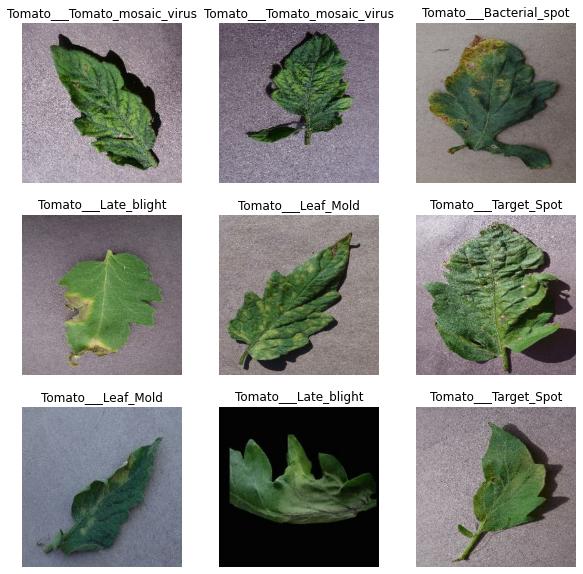

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_datagen.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_datagen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 256, 256, 3)
(64,)


7. Configure the datastream

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_datagen = train_datagen.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_datagen = val_datagen.cache().prefetch(buffer_size=AUTOTUNE)

8. Standarize the data

In [11]:
normalization_layer = layers.Rescaling(1./255)

9. Create Model

In [35]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
        normalization_layer,
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.build(input_shape=image_batch.shape)

10. Model summary

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (64, 256, 256, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (64, 254, 254, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (64, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (64, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (64, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (64, 60, 60, 64)         

11. Compile and train the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
  train_datagen,
  validation_data=val_datagen,
  verbose=1,
  epochs=25
)

12. Visualize the training result

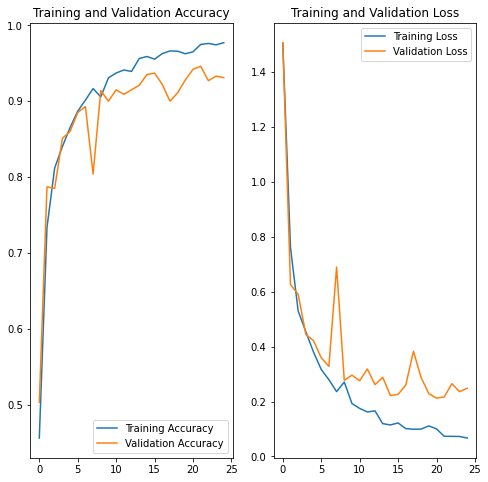

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

13. Try to predict with new image!

Saving 0a7cc59f-b2b0-4201-9c4a-d91eca5c03a3___PSU_CG 2230.JPG to 0a7cc59f-b2b0-4201-9c4a-d91eca5c03a3___PSU_CG 2230.JPG
0a7cc59f-b2b0-4201-9c4a-d91eca5c03a3___PSU_CG 2230.JPG
This image most likely belongs to Tomato___Tomato_mosaic_virus with a 23.20 percent confidence.


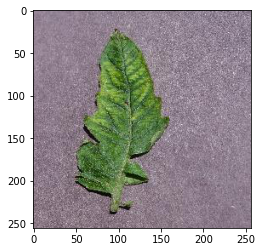

In [34]:
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  model_predict = model.predict(images, batch_size=10)
  score_predict = tf.nn.softmax(model_predict[0])
  plt.imshow(img)

  print(fn)
  # print(model_predict)
  # print(class_names[np.argmax(score_predict)], 100 * np.max(score_predict))
  print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_predict)], 100 * np.max(score_predict))
)

14. Save the model weights

In [ ]:
model.save_weights('tomato_disease_classifier_weights.h5')
files.download('tomato_disease_classifier_weights.h5')

## **15. Done for now!, and to be continued...**